# **Task 2: Customer Segmentation Using Unsupervised Learning**

# **Problem Statement & Objective**

# **Objective:**
Segment customers based on their spending behavior using unsupervised learning
(K-Means clustering) and propose targeted marketing strategies for each segment.

# **Business Goal:**
Help marketing teams understand customer groups and design personalized offers.



# **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


# **Dataset Loading & Description**

In [3]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")




In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape


(200, 5)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Rename Columns**

In [12]:
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score',
     'Genre':'Gender'
}, inplace=True)


In [13]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Exploratory Data Analysis (EDA)**

In [9]:
# Statistical Summary
df.describe()


,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


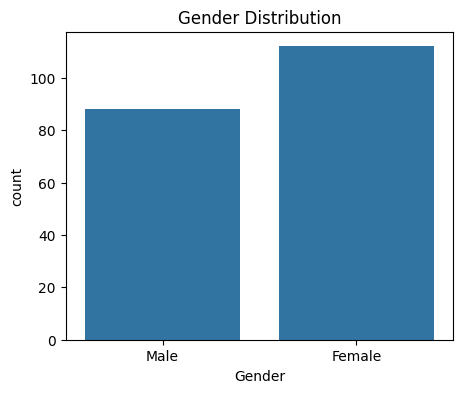

In [14]:
# Gender Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


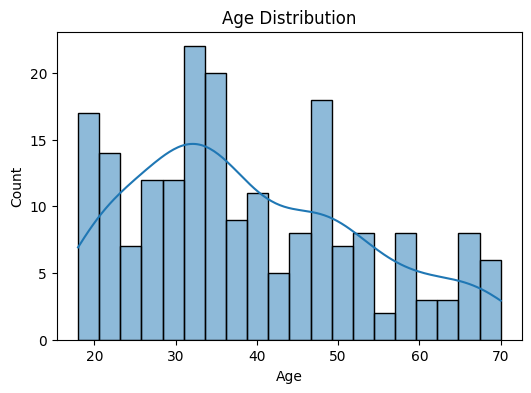

In [15]:
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


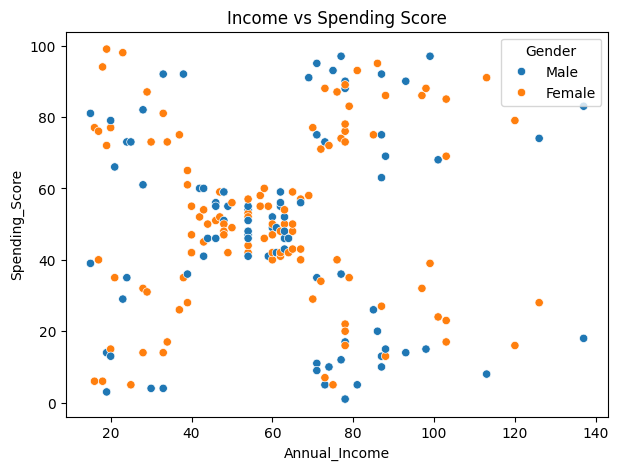

In [16]:
# Income vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    hue='Gender',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


# **Feature Selection & Scaling**

In [17]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Optimal Number of Clusters (Elbow Method)**

In [19]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


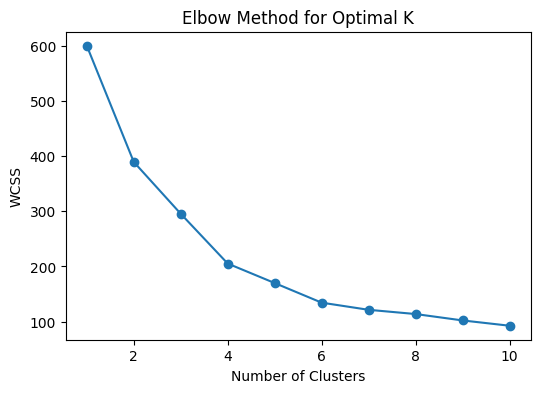

In [20]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


✔ Optimal clusters = 5

# **Apply K-Means Clustering**

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


In [22]:
clusters

array([2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

# **Visualize Clusters (Income vs Spending)**

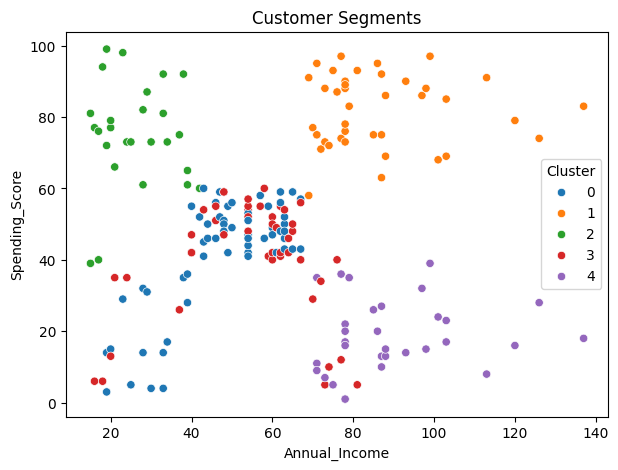

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual_Income',
    y='Spending_Score',
    hue='Cluster',
    palette='tab10',
    data=df
)
plt.title("Customer Segments")
plt.show()


# **Dimensionality Reduction for Visualization**

In [29]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]


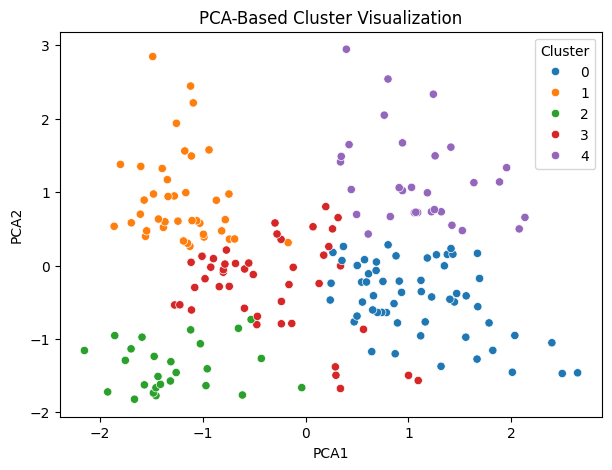

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='tab10',
    data=df
)
plt.title("PCA-Based Cluster Visualization")
plt.show()


# **Final Conclusion & Insights**


# Key Insights:
1. K-Means successfully segmented customers into 5 meaningful groups.
2. Spending behavior is not directly proportional to income.
3. PCA clearly visualize cluster separation.
4. Customer segmentation enables targeted and cost-effective marketing.

# Business Value:
- Improved customer satisfaction
- Higher conversion rates
- Better resource allocation